In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
c10=pd.read_csv(r"C:\Users\settibathula nithin\Downloads\C10_Loan1.csv")
c10

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes
5,No,Married,60,No
6,Yes,Divorced,220,No
7,No,Single,85,Yes
8,No,Married,75,No
9,No,Single,90,Yes


In [67]:
c10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Home Owner          10 non-null     object
 1   Marital Status      10 non-null     object
 2   Annual Income       10 non-null     int64 
 3   Defaulted Borrower  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes


In [68]:
c10.describe()

,Annual Income
count,10.000000
mean,104.000000
std,45.631373
min,60.000000
25%,77.500000
50%,92.500000
75%,115.000000
max,220.000000


In [42]:
c10["Home Owner"].value_counts()

Home Owner
No     7
Yes    3
Name: count, dtype: int64

In [69]:
HomeOwner ={"Home Owner":{"Yes":1,"No":2}}
c10=c10.replace(HomeOwner)
c10

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,1,Single,125,No
1,2,Married,100,No
2,2,Single,70,No
3,1,Married,120,No
4,2,Divorced,95,Yes
5,2,Married,60,No
6,1,Divorced,220,No
7,2,Single,85,Yes
8,2,Married,75,No
9,2,Single,90,Yes


In [70]:
c10=c10.drop(['Marital Status','Defaulted Borrower'],axis=1)
c10

,Home Owner,Annual Income
0,1,125
1,2,100
2,2,70
3,1,120
4,2,95
5,2,60
6,1,220
7,2,85
8,2,75
9,2,90


In [84]:
x=c10.drop("Home Owner",axis=1)
y=c10["Home Owner"]

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.48)

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [87]:
rf =RandomForestClassifier()

In [88]:
params ={ 'max_depth':[1,2,3,4,5],
         'min_samples_leaf':[2,4,6,8,10],
         'n_estimators':[1,3,5,7]
}

In [89]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=rf,param_grid=params,cv=2,scoring='accuracy')
gs.fit(x_train,y_train)

C:\Users\settibathula nithin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'n_estimators': [1, 3, 5, 7]},
             scoring='accuracy')

In [90]:
gs.best_score_

0.8333333333333333

In [91]:
rf_best = gs.best_estimator_
rf_best

RandomForestClassifier(max_depth=1, min_samples_leaf=2, n_estimators=1)

[Text(0.5, 0.5, 'gini = 0.48\nsamples = 3\nvalue = [2, 3]\nclass = No')]

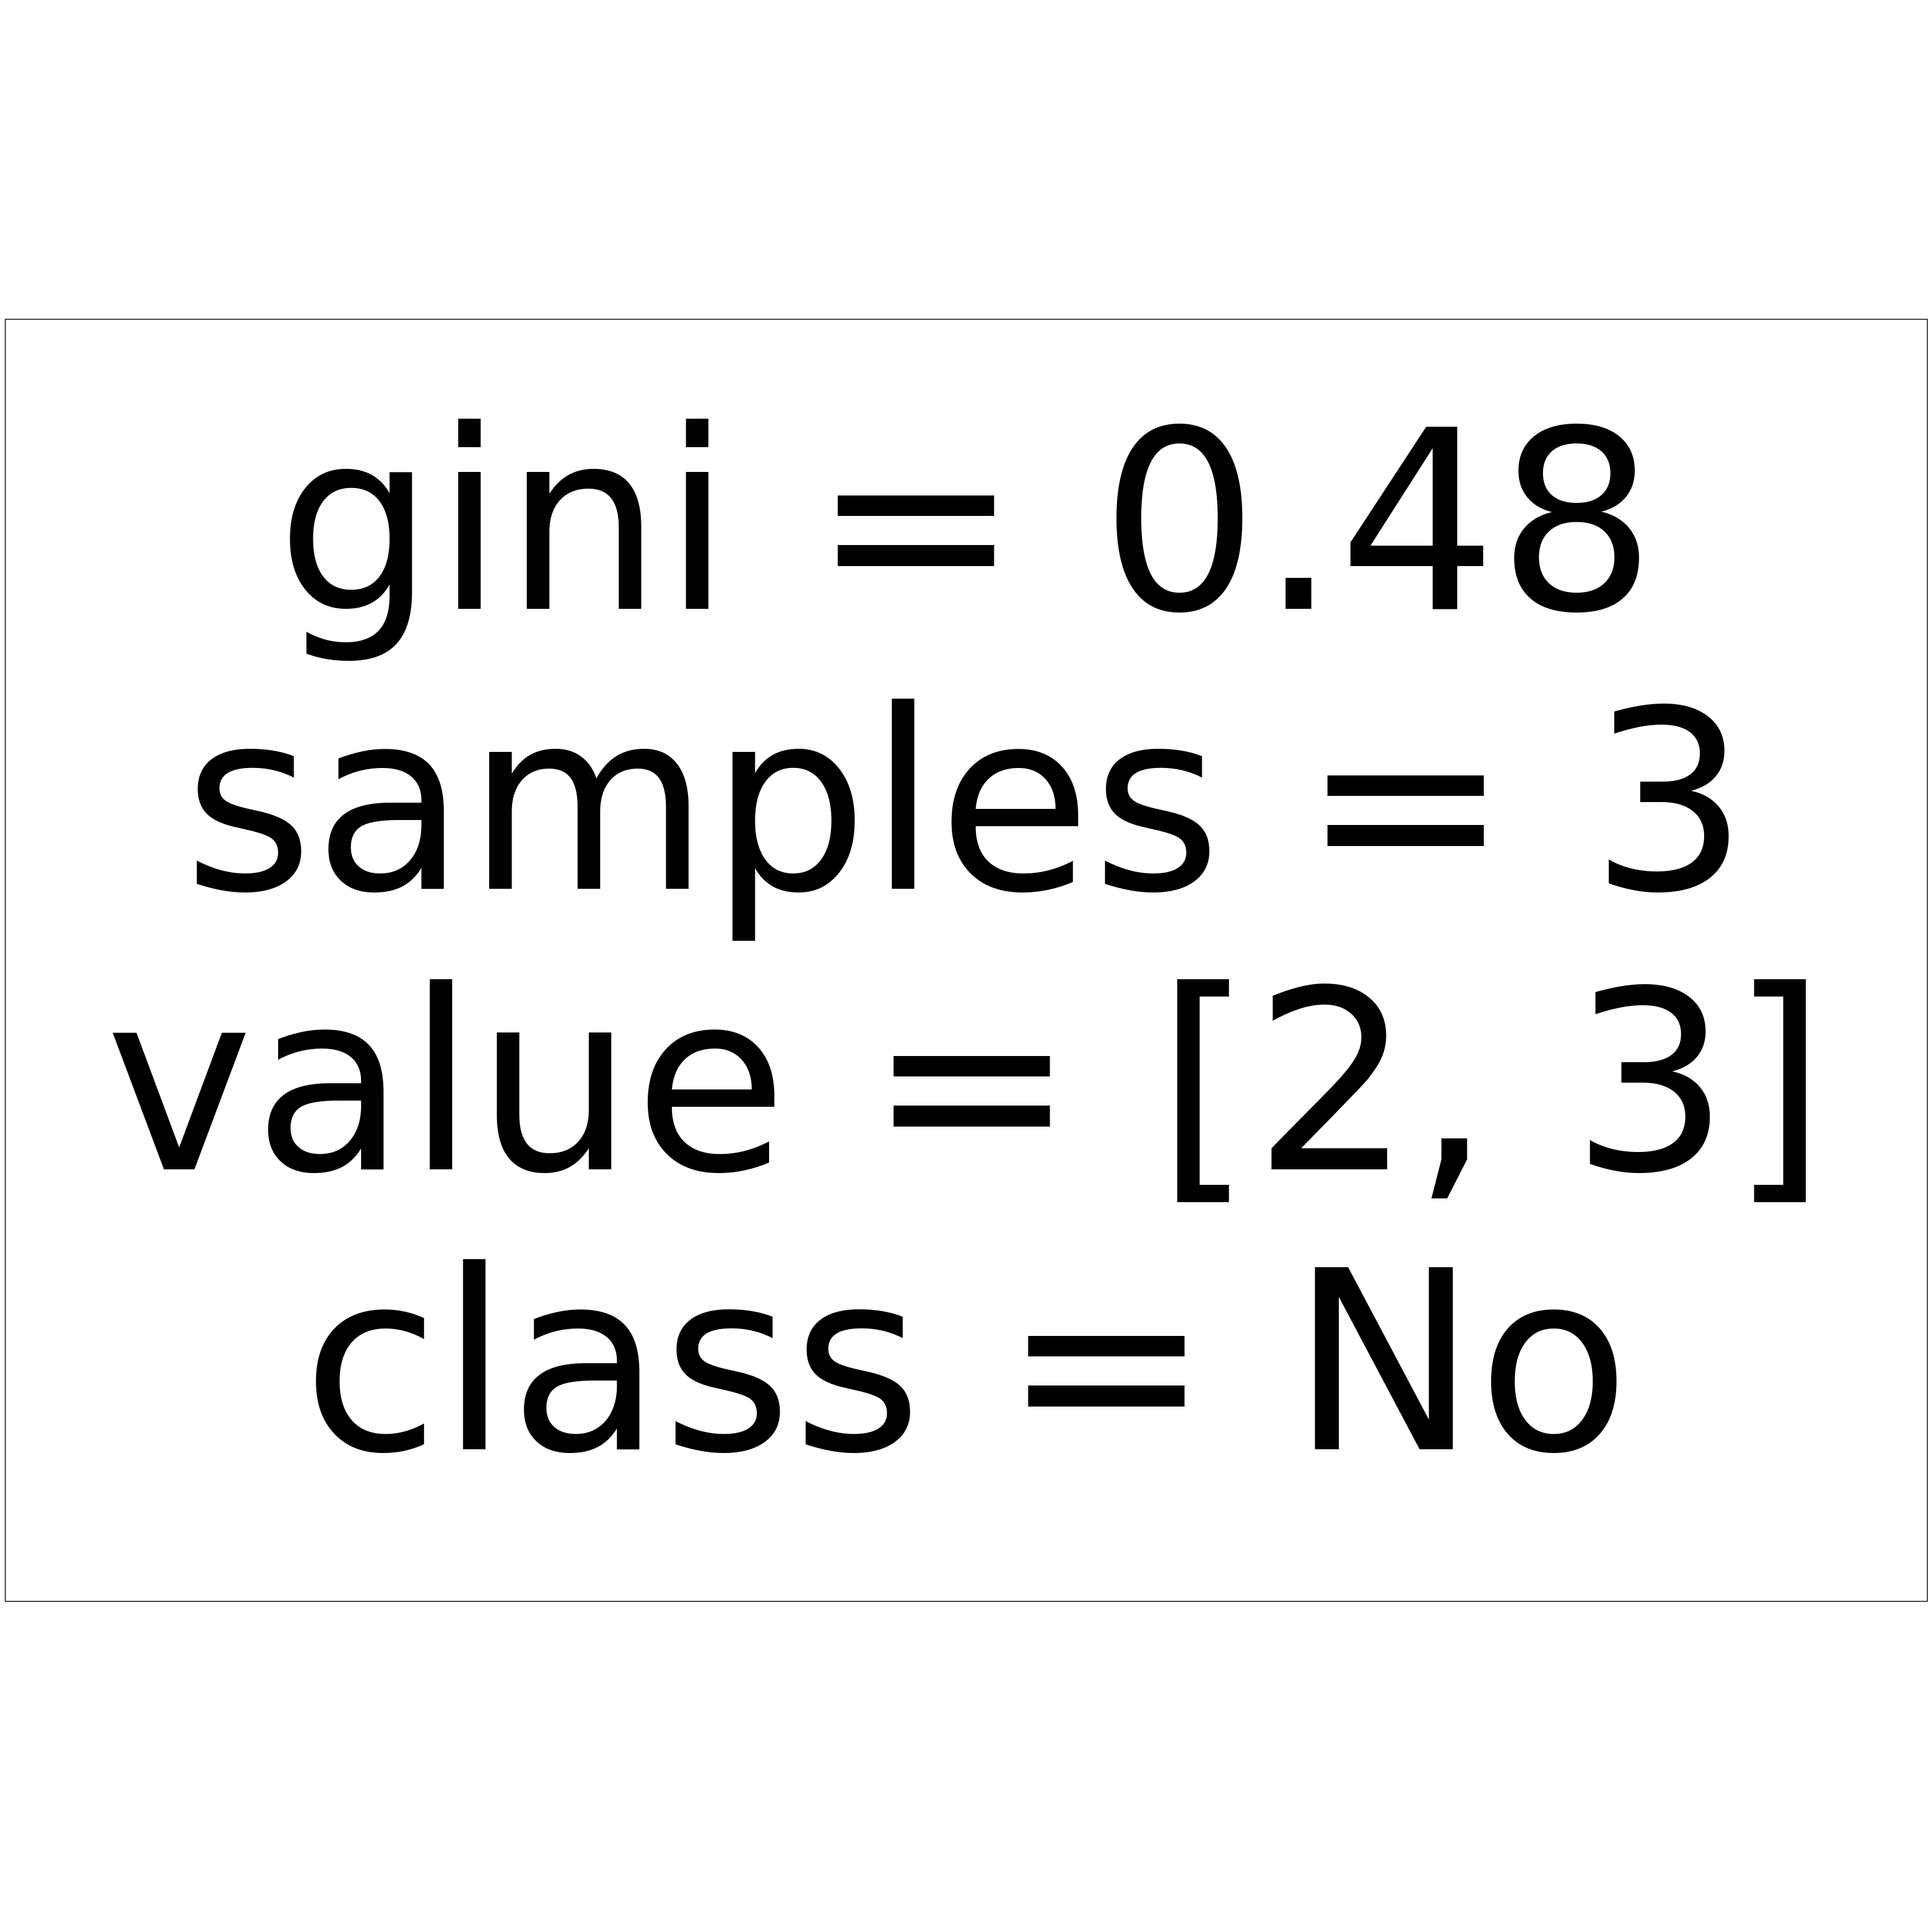

In [92]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(rf_best.estimators_[0],feature_names = None,class_names =['Yes','No'])

In [3]:
c1=pd.read_csv(r"C:\Users\settibathula nithin\Downloads\C3_Bot_detection_data.csv")
c1

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention
...,...,...,...,...,...,...,...,...,...,...,...
49995,491196,uberg,Want but put card direction know miss former h...,64,0,9911,True,1,Lake Kimberlyburgh,2023-04-20 11:06:26,teach quality ten education any
49996,739297,jessicamunoz,Provide whole maybe agree church respond most ...,18,5,9900,False,1,Greenbury,2022-10-18 03:57:35,add walk among believe
49997,674475,lynncunningham,Bring different everyone international capital...,43,3,6313,True,1,Deborahfort,2020-07-08 03:54:08,onto admit artist first
49998,167081,richardthompson,Than about single generation itself seek sell ...,45,1,6343,False,0,Stephenside,2022-03-22 12:13:44,star


In [4]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [5]:
c1.describe()

,User ID,Retweet Count,Mention Count,Follower Count,Bot Label
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,548890.680540,50.00560,2.513760,4988.602380,0.500360
std,259756.681425,29.18116,1.708563,2878.742898,0.500005
min,100025.000000,0.00000,0.000000,0.000000,0.000000
25%,323524.250000,25.00000,1.000000,2487.750000,0.000000
50%,548147.000000,50.00000,3.000000,4991.500000,1.000000
75%,772983.000000,75.00000,4.000000,7471.000000,1.000000
max,999995.000000,100.00000,5.000000,10000.000000,1.000000


In [6]:
c1["User ID"].value_counts()

User ID
132131    1
806186    1
229647    1
361672    1
999269    1
         ..
885228    1
440352    1
915627    1
723633    1
311204    1
Name: count, Length: 50000, dtype: int64

In [7]:
c1=c1.drop(['Username','Tweet','Verified','Location','Created At','Hashtags'],axis=1)
c1

,User ID,Retweet Count,Mention Count,Follower Count,Bot Label
0,132131,85,1,2353,1
1,289683,55,5,9617,0
2,779715,6,2,4363,0
3,696168,54,5,2242,1
4,704441,26,3,8438,1
...,...,...,...,...,...
49995,491196,64,0,9911,1
49996,739297,18,5,9900,1
49997,674475,43,3,6313,1
49998,167081,45,1,6343,0


In [8]:
x=c1.drop("Bot Label",axis=1)
y=c1["Bot Label"]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.48)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [11]:
rf =RandomForestClassifier()

In [12]:
params ={ 'max_depth':[1,2,3,4,5],
         'min_samples_leaf':[2,4,6,8,10],
         'n_estimators':[1,3,5,7]
}

In [13]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=rf,param_grid=params,cv=2,scoring='accuracy')
gs.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'n_estimators': [1, 3, 5, 7]},
             scoring='accuracy')

In [14]:
gs.best_score_

0.5067692307692309

In [15]:
rf_best = gs.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_estimators=1)

[Text(0.5, 0.875, 'x[2] <= 2.5\ngini = 0.5\nsamples = 16453\nvalue = [12985, 13015]\nclass = No'),
 Text(0.25, 0.625, 'x[3] <= 9965.5\ngini = 0.5\nsamples = 8130\nvalue = [6262, 6496]\nclass = No'),
 Text(0.125, 0.375, 'x[0] <= 997249.5\ngini = 0.5\nsamples = 8102\nvalue = [6249, 6462]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 8074\nvalue = [6237, 6426]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.375\nsamples = 28\nvalue = [12, 36]\nclass = No'),
 Text(0.375, 0.375, 'x[3] <= 9983.0\ngini = 0.4\nsamples = 28\nvalue = [13, 34]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.219\nsamples = 12\nvalue = [3, 21]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.491\nsamples = 16\nvalue = [10, 13]\nclass = No'),
 Text(0.75, 0.625, 'x[3] <= 9513.5\ngini = 0.5\nsamples = 8323\nvalue = [6723, 6519]\nclass = Yes'),
 Text(0.625, 0.375, 'x[0] <= 685676.0\ngini = 0.5\nsamples = 7922\nvalue = [6433, 6153]\nclass = Yes'),
 Text(0.5625, 0.125, 'gini = 0.499\nsamples = 5138\nvalue = [4276, 

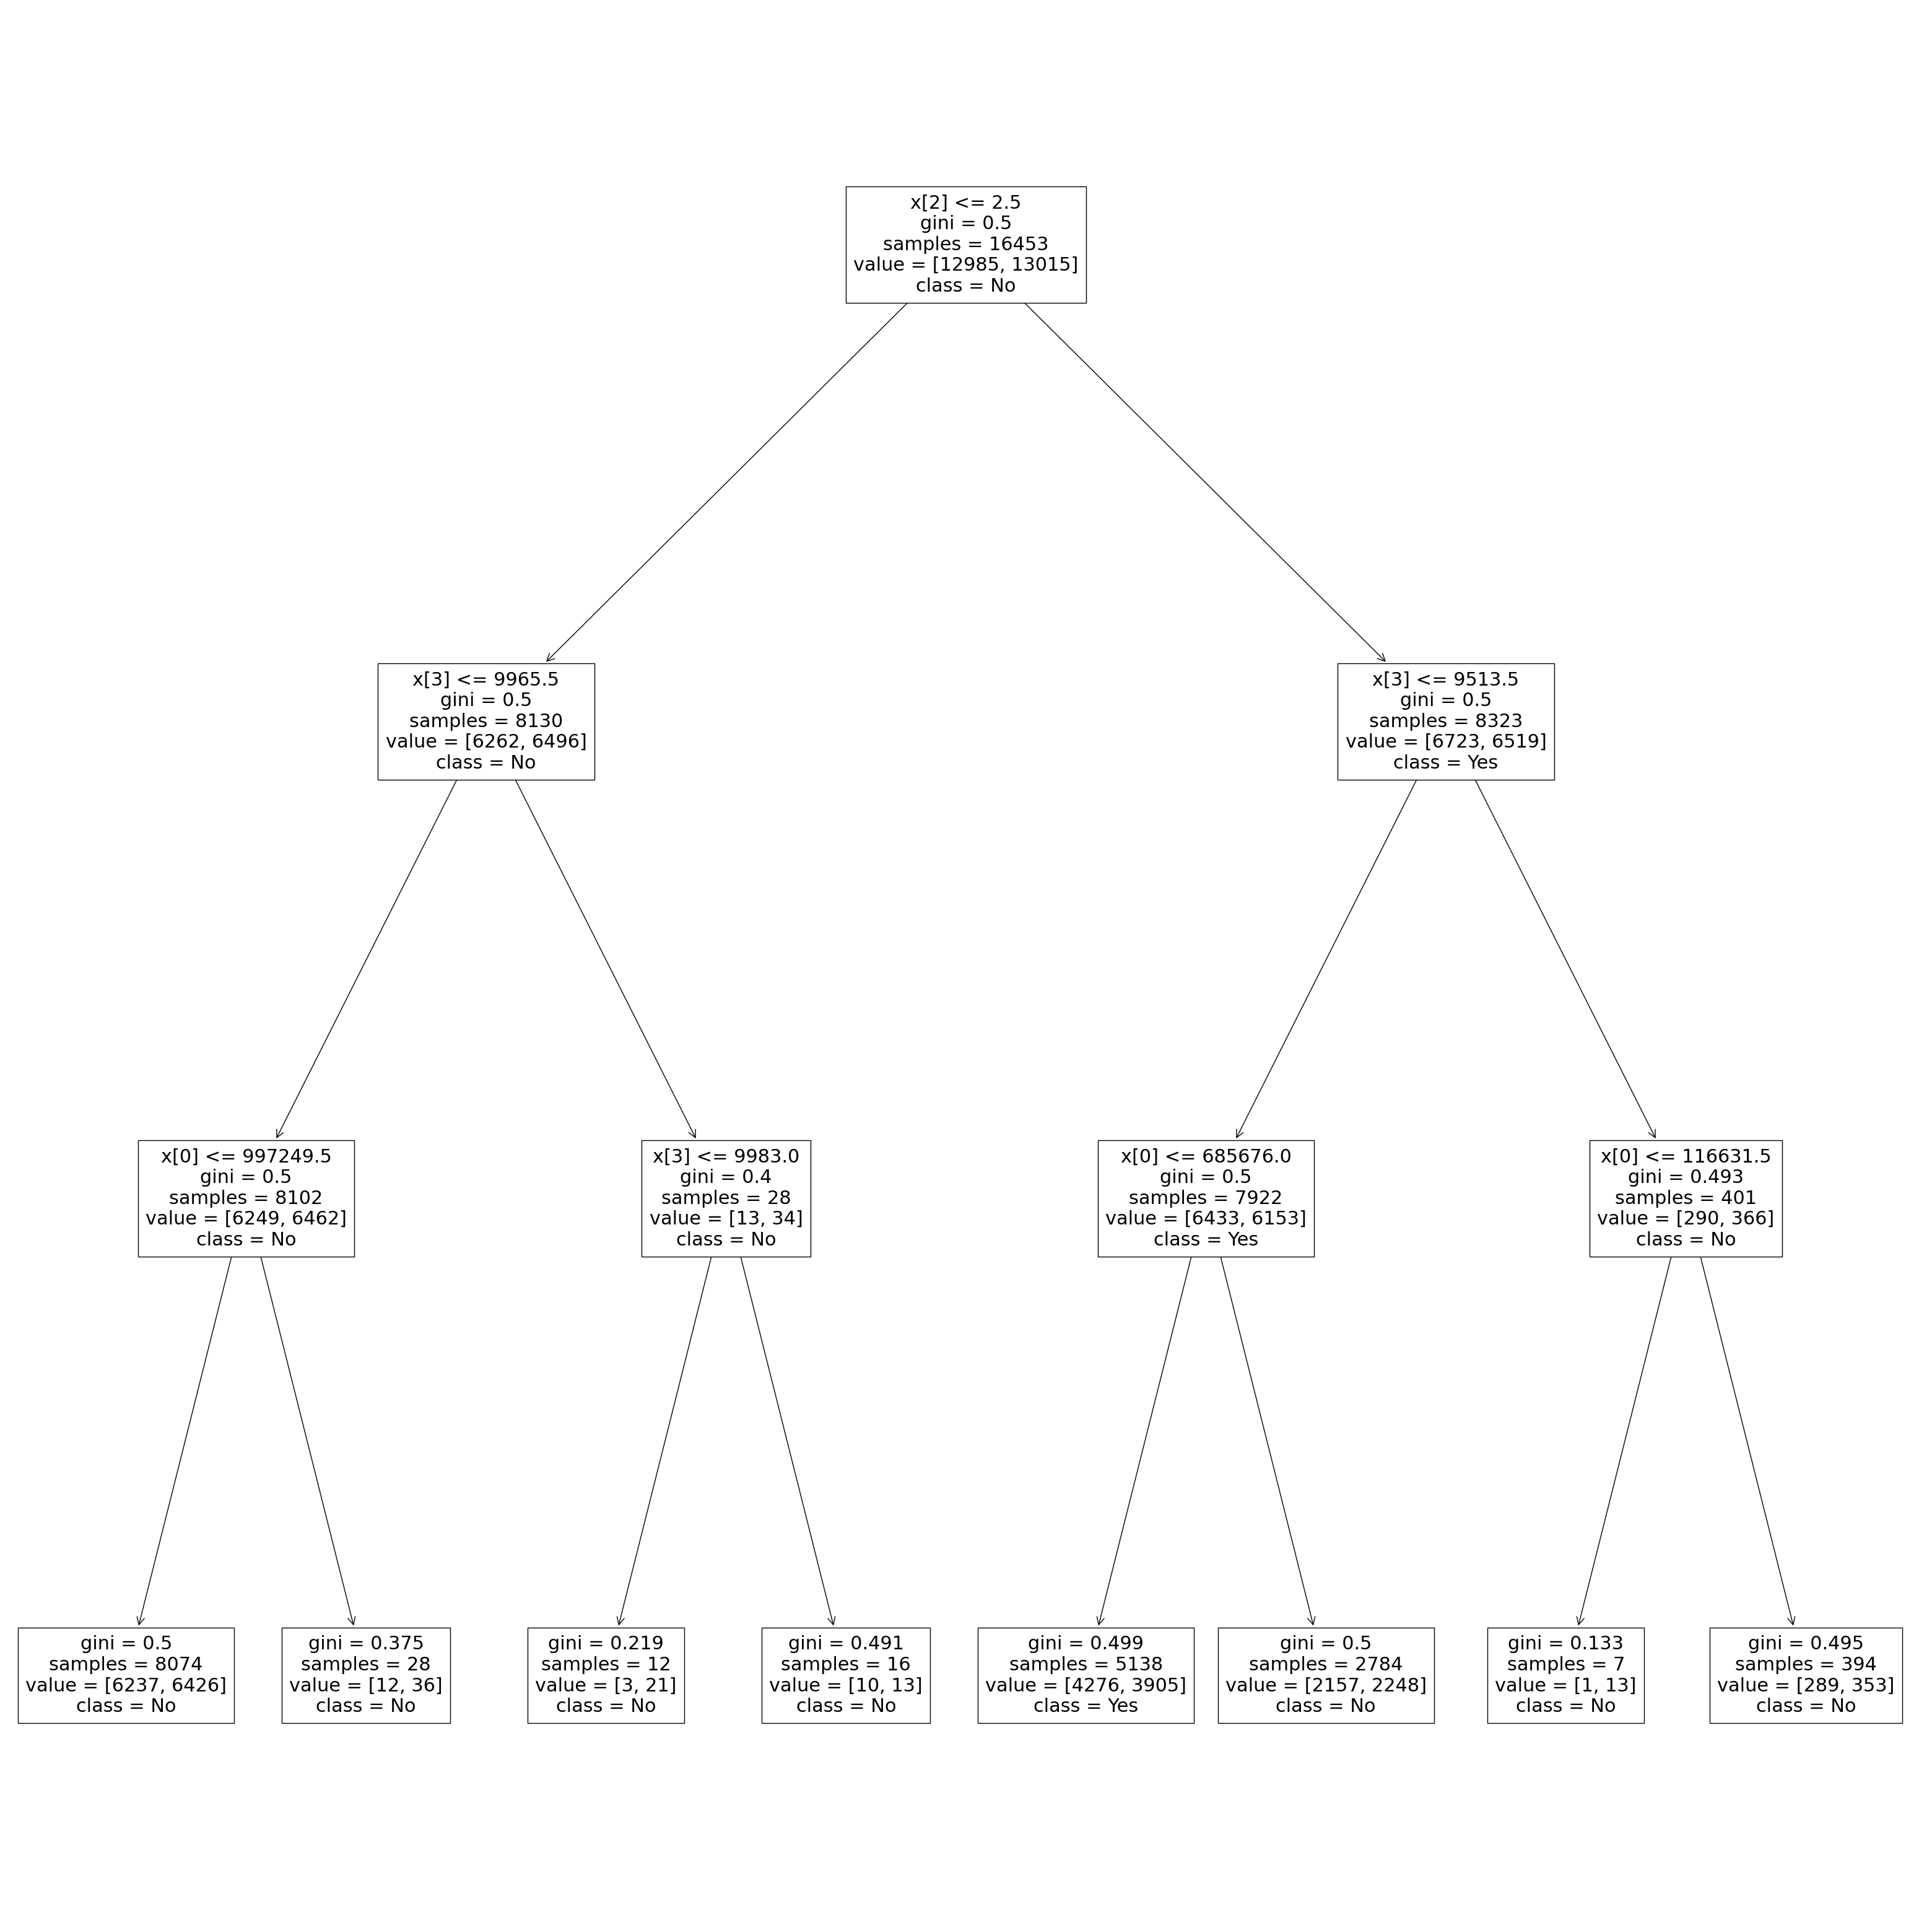

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(rf_best.estimators_[0],feature_names = None,class_names =['Yes','No'])